<a href="https://colab.research.google.com/github/higor-gomes93/mestrado_dissertacao/blob/main/Nuvem_de_Palavras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

import matplotlib.pyplot as plt
import nltk
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import string
import pandas as pd

In [2]:
gc = gspread.authorize(GoogleCredentials.get_application_default())

planilha = gc.open('[Dissertação] Lista de Artigos V1').sheet1

rows = planilha.get_all_values()

df = pd.DataFrame.from_records(rows)
df.columns = df.iloc[0]
final_df = df.drop(df.index[0])

In [3]:
lista_2 = list(final_df["keywords"])

In [4]:
palavras_chave = []
for i in lista_2:
  if i != "":
    palavras_chave.extend(i.split(", "))

keywords = " ".join(palavras_chave)
keywords

"Interactive controls Management control systems Strategy Strategic change UK Menstruation Heavy menstrual bleeding Self-management Lean production Scale development Confirmatory factor analysis People capability Projects Project-based organisations Human resource management People management systems Organisational capabilities Project capabilities Innovative culture Technical innovation Administrative innovation Radical innovation Total quality management Competitive advantage China HRM transfer Institutional change MNC subsidiaries Strategic human resource management Recruitment Marketing Knowledge management ERP Success Continuous improvement Research model Cellular manufacturing Cell loading Product sequencing Mathematical models Knowledge management strategy Mu1tiple criteria decision-making (MCDM) Analytic network process (ANP) Decision making trial and evaluation laboratory (DEMATEL) TQM R&D Quality Innovation Structural equation modelling Managing strategy Human resource manage

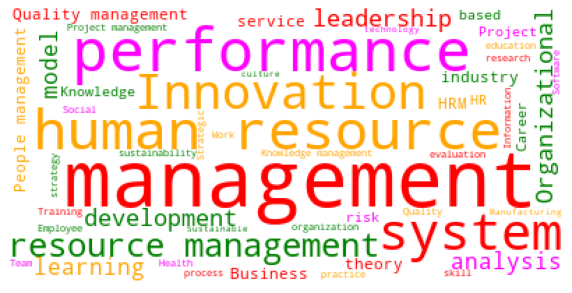

In [7]:
# Definição das cores que serão utilizadas na nuvem de palavras
mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta'])
# Criação da nuvem de palavras, com no máximo 50 palavras
nuvem = WordCloud(background_color = 'white', colormap = mapa_cores, max_words = 50)
# Criação e visualização da nuvem de palavras
nuvem.generate(keywords)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(nuvem, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(nuvem)

In [6]:
frequencia = nltk.FreqDist(palavras_chave)
frequencia_final = {}

for i in frequencia.keys():
  if frequencia[i] > 10:
    frequencia_final[i] = frequencia[i]

frequencia_final

{'China': 13,
 'HRM': 12,
 'Human resource management': 24,
 'India': 14,
 'Innovation': 24,
 'Knowledge management': 22,
 'Leadership': 14,
 'Performance': 19,
 'Project management': 15,
 'Quality management': 25,
 'Strategy': 11,
 'Sustainability': 11}